#Implementation and plot of different fuzzy membership functions over x. Each function is Plotted with three different sets of other parameters.

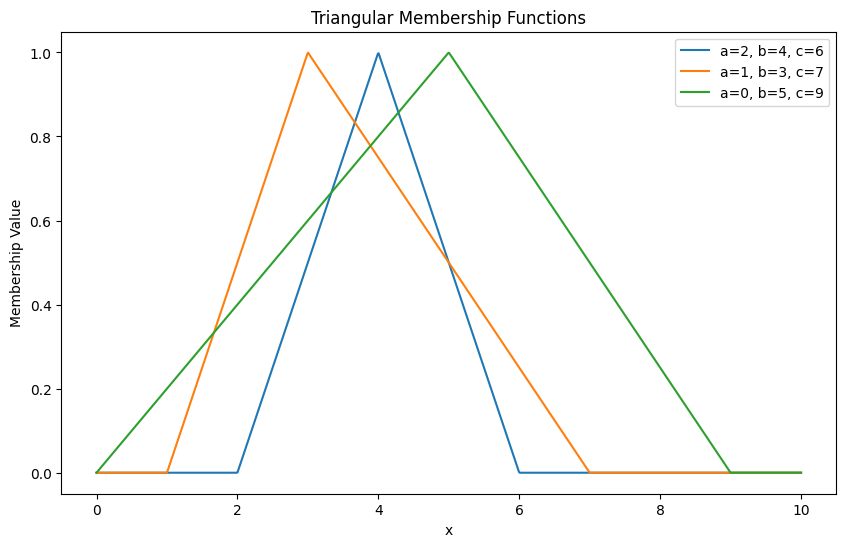

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def triangular(x, a, b, c):
    result = np.zeros_like(x)  # Initialize result array

    # Apply triangular function element-wise
    result[(x > a) & (x <= b)] = (x[(x > a) & (x <= b)] - a) / (b - a)
    result[(x > b) & (x < c)] = (c - x[(x > b) & (x < c)]) / (c - b)

    return result

# Define the range of x values
x_values = np.linspace(0, 10, 1000)

# Parameters for three different triangular membership functions
params_sets = [(2, 4, 6), (1, 3, 7), (0, 5, 9)]

plt.figure(figsize=(10, 6))
for params in params_sets:
    a, b, c = params
    membership_values = [triangular(x, a, b, c) for x in x_values]
    plt.plot(x_values, membership_values, label=f'a={a}, b={b}, c={c}')

plt.title('Triangular Membership Functions')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.legend()
plt.show()


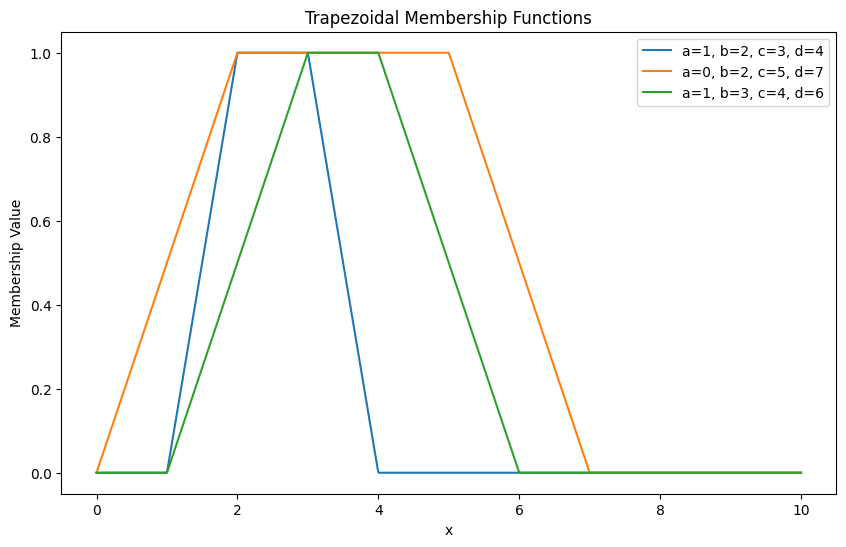

In [ ]:
def trapezoid(x, a, b, c, d):
    result = np.zeros_like(x)  # Initialize result array

    # Apply trapezoid function element-wise
    result[(a <= x) & (x <= b)] = (x[(a <= x) & (x <= b)] - a) / (b - a)
    result[(b <= x) & (x <= c)] = 1
    result[(c <= x) & (x <= d)] = (d - x[(c <= x) & (x <= d)]) / (d - c)

    return result

# Define the range of x values
x_values = np.linspace(0, 10, 1000)

# Parameters for three different trapezoidal membership functions
params_sets = [(1, 2, 3, 4), (0, 2, 5, 7), (1, 3, 4, 6)]

plt.figure(figsize=(10, 6))
for params in params_sets:
    a, b, c, d = params
    membership_values = [trapezoid(x, a, b, c, d) for x in x_values]
    plt.plot(x_values, membership_values, label=f'a={a}, b={b}, c={c}, d={d}')

plt.title('Trapezoidal Membership Functions')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.legend()
plt.show()


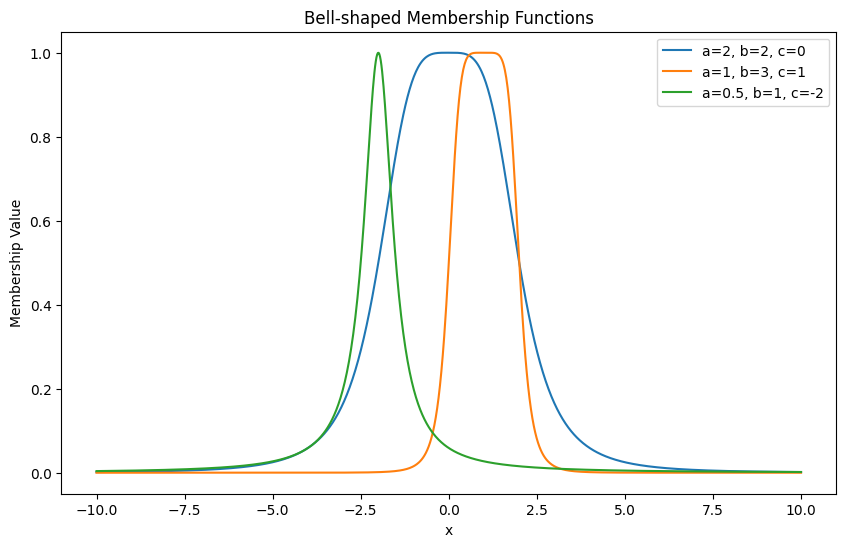

In [ ]:
def bell(x, a, b, c):
    if a <= 0:
        raise ValueError("Parameter 'a' must be greater than 0.")
    return 1 / (1 + ((x - c) / a) ** (2 * b))

# Define the range of x values
x_values = np.linspace(-10, 10, 1000)

# Parameters for three different bell-shaped membership functions
params_sets = [(2, 2, 0), (1, 3, 1), (0.5, 1, -2)]

plt.figure(figsize=(10, 6))
for params in params_sets:
    a, b, c = params
    membership_values = [bell(x, a, b, c) for x in x_values]
    plt.plot(x_values, membership_values, label=f'a={a}, b={b}, c={c}')

plt.title('Bell-shaped Membership Functions')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.legend()
plt.show()


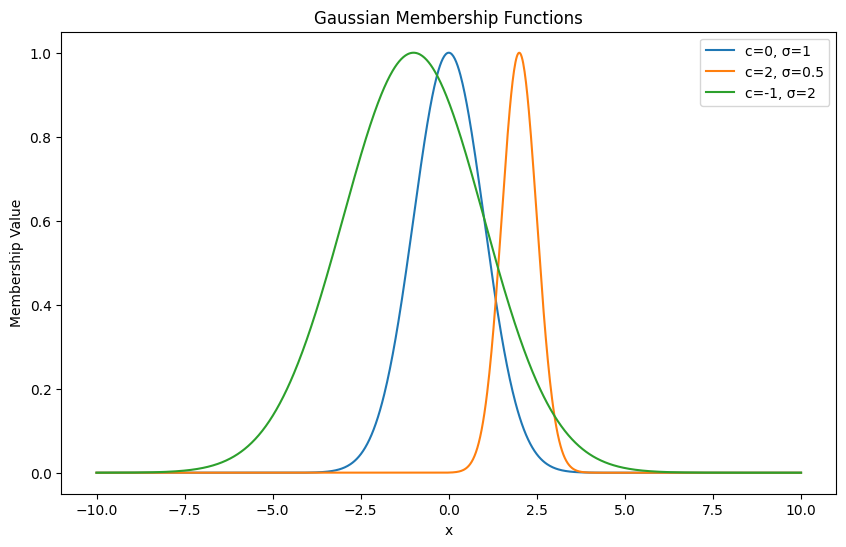

In [ ]:
def gaussian(x, c, sigma):
    if sigma <= 0:
        raise ValueError("Parameter 'sigma' must be greater than 0.")
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

# Define the range of x values
x_values = np.linspace(-10, 10, 1000)

# Parameters for three different Gaussian membership functions
params_sets = [(0, 1), (2, 0.5), (-1, 2)]

plt.figure(figsize=(10, 6))
for params in params_sets:
    c, sigma = params
    membership_values = [gaussian(x, c, sigma) for x in x_values]
    plt.plot(x_values, membership_values, label=f'c={c}, σ={sigma}')

plt.title('Gaussian Membership Functions')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.legend()
plt.show()


#Implementation of different defuzzification methods, and printing their results with a fuzzy set trapezoid (x,10,30,50,90).


In [ ]:
x = np.linspace(0, 100, 1000)
y = trapezoid(x, 10, 30, 50, 90)

#the maximum x value where the membership function is maximized
max_x = x[y == y.max()]

som = max_x.min()
lom = max_x.max()
coa = (np.sum(y * x) / np.sum(y))
mom = (np.sum(max_x)/len(max_x))

# Print results
print("Smallest of max:", som)
print("Largest of max:", lom)
print("Centroid of Area:", coa)
print("Mean of Max:", mom)



Smallest of max: 30.030030030030034
Largest of max: 49.94994994994995
Centroid of Area: 46.000008024056115
Mean of Max: 39.98998998998999


#Implementation of a single-input and single-output Mamdani fuzzy inference system

In [ ]:
def trapezoid(x, a, b, c, d):
    return np.piecewise(x,
                      [x <= a, (a <= x) & (x <= b), (b <= x) & (x <= c), (c <= x) & (x <= d), d <= x],
                      [0, lambda x: (x - a) / (b - a), 1, lambda x: (d - x) / (d - c), 0])


x = np.linspace(-20, 20, 1000)

input_args = [
    (-20, -15, -6, -3),
    (-6, -3, 3, 6),
    (3, 6, 15, 20)
]

output_args = [
    (-2.46, -1.46, 1.46, 2.46),
    (1.46, 2.46, 5, 7),
    (5, 7, 13, 15)
]

input_ranges = [trapezoid(x, *args) for args in input_args]
output_ranges = [trapezoid(x, *args) for args in output_args]

inputs = [-8.0, -5.0, 0.0, 5.0, 8.0]

for func_input in inputs:
    memberships_in = [trapezoid(func_input, *args).item() for args in input_args]
    fuzzy_outs = np.array([np.clip(np.copy(output_ranges[i]), None, memberships_in[i]) for i in range(len(input_args))])
    combined = fuzzy_outs.max(axis=0)

    coa = np.sum(x * combined) / np.sum(combined)
    print("Input %d: Output: %.3f" % (func_input, coa))

Input -8: Output: 0.000
Input -5: Output: 1.522
Input 0: Output: 4.011
Input 5: Output: 8.852
Input 8: Output: 10.000
